# 7.1 Множественная линейная регрессия

In [232]:
import scipy.stats as sps
import numpy as np

In [233]:
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

price = beta0 + beta1 * year + eps

In [235]:
data = pd.read_csv('https://stepik.org/media/attachments/lesson/26278/car_regr.txt', sep = '\t')
data

,price,year,mileage,auto
0,250,2010,67.0,MT
1,365,2013,59.0,MT
2,365,2013,59.0,MT
3,250,2009,95.0,MT
4,310,2011,76.5,MT
5,125,2007,203.0,MT
6,150,2006,146.0,MT
7,225,2008,83.0,MT
8,269,2013,71.0,MT
9,250,2010,175.0,MT


In [236]:
year = np.array(data['year']).reshape(-1, 1)
price = np.array(data['price']).reshape(-1, 1)
n = len(price)

In [237]:
linreg = LinearRegression()
linreg.fit(y=price, X=year)

LinearRegression()

beta1

In [238]:
beta1 = linreg.coef_[0]
beta1

array([26.04339938])

beta0

In [239]:
beta0 = linreg.intercept_
beta0

array([-52090.26932288])

Найдите остаток, соответствующий первому наблюдению

In [240]:
price[0][0] - (beta0 + beta1*year[0][0])

array([-6.9634226])

Найдите остаточную сумму квадратов RSS 

In [157]:
rss = sum(map(lambda x: (x[0][0] - (beta0 + beta1*x[1][0]))**2, zip(price, year)))
rss

array([132015.31925394])

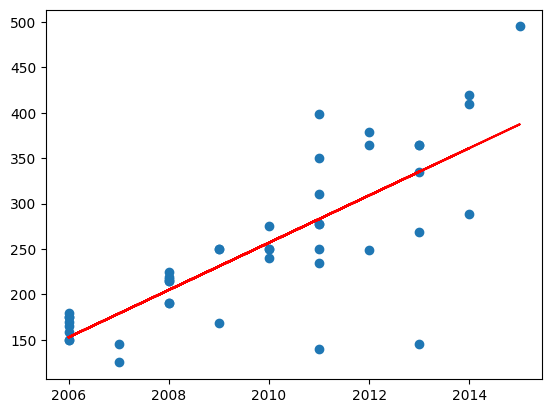

In [103]:
y_pred = linreg.predict(year)
plt.scatter(year, price)
plt.plot(year, y_pred, 'r')
plt.show()

Оценка дисперсии ошибок наблюдений

In [160]:
S2 = rss/(n-2)
S = S2[0]**0.5
S

56.06444405323695

Найдите точность 95%го доверительного интервала для параметра beta1
 

In [206]:
quantile = sps.t.ppf(1-alpha/2, n-2)
quantile*S*np.sqrt(1/(n*np.std(year)**2))

6.3935748187600945

Найдите прогноз цены  автомобиля 2012 года выпуска

In [247]:
P = (beta0 + beta1*2012)[0]
P

309.05022135133186

Какова вероятность того, что цена  автомобиля Logan 2012 года выпуска будет меньше 290 тыс. руб?

In [264]:
x = (sum(year)/len(year))[0]
d = np.std(year)**2
x, d
Z = (P - 290)/(S*np.sqrt((1+(2012-x)**2/d)/n))
1 - sps.t.cdf(Z, n-2)


0.04481701961777995